In [1]:
# Author: Phuong Huong Nguyen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import dataset

In [3]:
orders_df = pd.read_csv('orders.csv', sep='|')
orders_df

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1
...,...,...,...,...
1071533,2021-01-31,22114,29567,2
1071534,2021-01-31,22114,21068,1
1071535,2021-01-31,10900,18270,1
1071536,2021-01-31,17894,31265,5


In [4]:
orders_agg = orders_df.groupby(['userID', 'itemID', 'date']).agg({'order': 'sum'}).reset_index()
orders_agg

,userID,itemID,date,order
0,0,1505,2020-09-01,1
1,0,6446,2020-12-11,1
2,0,6446,2021-01-15,1
3,0,9325,2020-11-20,1
4,0,12468,2020-08-03,1
...,...,...,...,...
1071015,46137,22403,2021-01-18,1
1071016,46137,22583,2021-01-31,1
1071017,46137,28343,2020-08-08,1
1071018,46137,28900,2020-08-08,2


In [4]:
orders_agg.to_csv('new_orders_aggregation.csv', sep = '|')

In [3]:
items_df = pd.read_csv('items.csv', sep='|')
items_df

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


In [4]:
category_df = pd.read_csv('category_hierarchy.csv', sep='|')
category_df

,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


In [5]:
submission_df = pd.read_csv('submission.csv', sep = '|')
submission_df

,userID,itemID,prediction
0,0,20664,NaN
1,0,28231,NaN
2,13,2690,NaN
3,15,1299,NaN
4,15,20968,NaN
...,...,...,...
9995,46118,20106,NaN
9996,46124,19677,NaN
9997,46125,12878,NaN
9998,46127,7963,NaN


# Data Imputation (Missing data replacement)
- I found out that the dataset items.csv has some missing data. 
- But i still haven't know whether it is an importat feature for our model or not. If it isn't, we can ignore it.

In [6]:
items_df.info()
# >>> column categories of items_df has some missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      32776 non-null  int64 
 1   brand       32776 non-null  int64 
 2   feature_1   32776 non-null  int64 
 3   feature_2   32776 non-null  int64 
 4   feature_3   32776 non-null  int64 
 5   feature_4   32776 non-null  int64 
 6   feature_5   32776 non-null  int64 
 7   categories  25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB


In [7]:
# Caculating the percentage of missing data in items_df. Then we can decide the way to deal with these missing data
for col in items_df.columns:
    missing_data = items_df[col].isna().sum()
    missing_percent = round((missing_data / len(items_df) )* 100, 2)
    print(f"The column {col} has {missing_percent} % of missing data")

The column itemID has 0.0 % of missing data
The column brand has 0.0 % of missing data
The column feature_1 has 0.0 % of missing data
The column feature_2 has 0.0 % of missing data
The column feature_3 has 0.0 % of missing data
The column feature_4 has 0.0 % of missing data
The column feature_5 has 0.0 % of missing data
The column categories has 20.71 % of missing data


### Calculate missing data in feature columns of items_df. (note: missing data = -1)
*I'm seeking for a better solution to show percentage of missing data of each feature column*

In [8]:
for col in items_df.drop(columns=['itemID', 'brand','categories']).columns:
    minus_feature = items_df[items_df[col] == -1].count()
    missing_percent = round((minus_feature / len(items_df) )* 100, 2)
    print(f"The column {col} has {missing_percent} % of missing data")
type(missing_percent)

The column feature_1 has itemID        0.01
brand         0.01
feature_1     0.01
feature_2     0.01
feature_3     0.01
feature_4     0.01
feature_5     0.01
categories    0.01
dtype: float64 % of missing data
The column feature_2 has itemID        0.0
brand         0.0
feature_1     0.0
feature_2     0.0
feature_3     0.0
feature_4     0.0
feature_5     0.0
categories    0.0
dtype: float64 % of missing data
The column feature_3 has itemID        1.42
brand         1.42
feature_1     1.42
feature_2     1.42
feature_3     1.42
feature_4     1.42
feature_5     1.42
categories    1.34
dtype: float64 % of missing data
The column feature_4 has itemID        1.88
brand         1.88
feature_1     1.88
feature_2     1.88
feature_3     1.88
feature_4     1.88
feature_5     1.88
categories    1.81
dtype: float64 % of missing data
The column feature_5 has itemID        13.01
brand         13.01
feature_1     13.01
feature_2     13.01
feature_3     13.01
feature_4     13.01
feature_5     13.01
cat

pandas.core.series.Series

Text(0.5, 1.0, 'Missing data of items.csv')

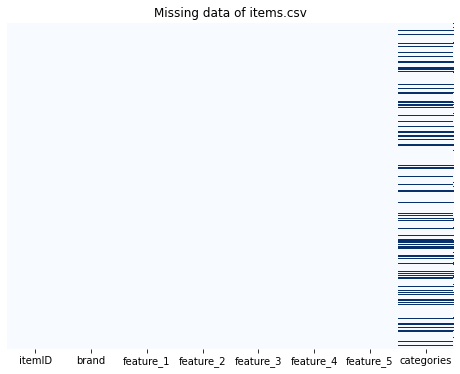

In [9]:
plt.subplots(figsize=(8, 6))
sns.heatmap(items_df.isna(), cmap='Blues', cbar= False, yticklabels=False)
plt.title('Missing data of items.csv')

- From the plot above we found that only the column categories has missing data
- I think this missing data may play an important role in our model. Because there are a huge amount of items, so it is really hard and nonsense when we focus on analize each of them. And the most important point are type of products which we are selling:
    - **Convenience goods**: are often purchased through habit or impulse and are relatively inexpensive.
    --> so a lot of items can be bought together and at the same time  --> we can try to group items (categories) which are bougth together by each user
    --> **I think, our model may be built based on frequent Itemset algorithms**

# Data analysis and visualisation (especially focus on the orders.csv)

In [10]:
# find out the number of orders which are bought by each userID
users_buy_orders = orders_df.groupby(['userID']).agg({'order': 'sum'}).sort_values(by='order', ascending=False).reset_index()
users_buy_orders.head()

,userID,order
0,38604,696
1,22696,593
2,1958,555
3,15833,325
4,13554,306


- The above is the top 5 of users who bought items during the given period

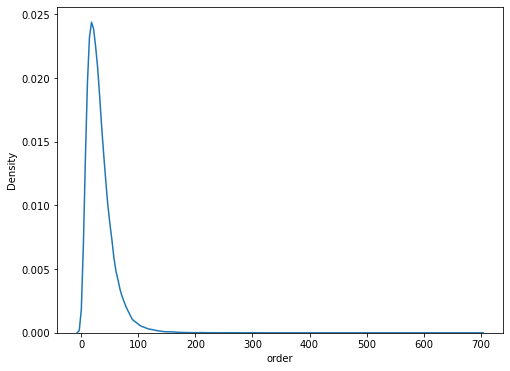

In [11]:
plt.subplots(figsize=(8, 6))
sns.kdeplot(data=users_buy_orders, x='order');

- Most of customers(users) have 0 to 120 orders during the period of times 1/6/20 - 31/1/21

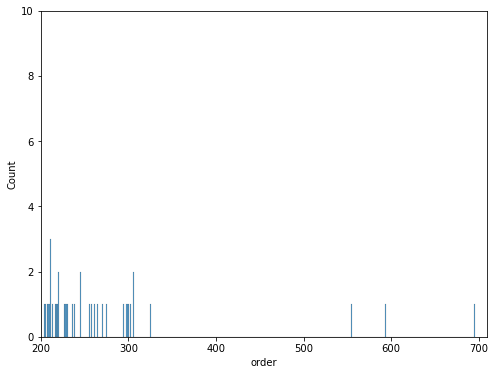

In [12]:
plt.subplots(figsize=(8, 6))
sns.histplot(data=users_buy_orders, x='order')
plt.xlim(200, 710)
plt.ylim(0,10);

- There are only few users who bought a huge amount of items


# Analizing the relationship between date and order, itemID

In [13]:
orders_df['itemID'].nunique()  # amount of different items which are bought during that preriod

31756

In [14]:
# Calculate the number of orders per day
date_orders_df = orders_df.groupby('date')['order'].sum().reset_index()
date_orders_df

,date,order
0,2020-06-01,7148
1,2020-06-02,6039
2,2020-06-03,6781
3,2020-06-04,5904
4,2020-06-05,5118
...,...,...
240,2021-01-27,7029
241,2021-01-28,5887
242,2021-01-29,6682
243,2021-01-30,11304


In [15]:
sort_orders = date_orders_df.sort_values('order',ascending=False)
sort_orders.head(10)

,date,order
243,2021-01-30,11304
244,2021-01-31,10441
194,2020-12-12,9867
173,2020-11-21,9862
181,2020-11-29,9535
231,2021-01-18,9534
175,2020-11-23,9412
187,2020-12-05,9268
195,2020-12-13,9242
188,2020-12-06,9222


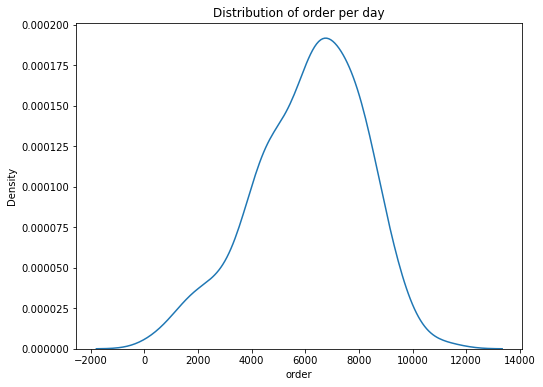

In [16]:
plt.subplots(figsize=(8, 6))
sns.kdeplot(data=date_orders_df['order'])
plt.title('Distribution of order per day');

- orders based on date are distributed quite normal. So analyzing correlation between order and day is not really meaningful

### Processing column date in orders.csv

In [17]:
# convert column date in orders_df from str type to datetime type
orders_df['date'] = pd.to_datetime(orders_df['date'])


In [18]:
# calculate week of month
from math import ceil
def week_of_month(dt):
    #irst_day = dt.replace(day=1)
    #om = dt.day
    #djusted_dom = dom + first_day.weekday()
    #eturn int(ceil((adjusted_dom - 1) / 7.0))
    return int((dt.day - 1) / 7 ) + 1
    #return int((dt.day) / 7 )
#week_of_month('2020-06-01')

# ?Need to check again the accuracy of week_of_year with someone

In [20]:
# separate column date into several columns (dayofweek, weekofmonth, month, year), so that we can be easier to groupby data later
copy_orders_df = orders_df.copy()
copy_orders_df['day_of_week'] = copy_orders_df['date'].dt.day
copy_orders_df['week_of_month'] = copy_orders_df['date'].apply(week_of_month)
copy_orders_df['month'] = copy_orders_df['date'].dt.month
copy_orders_df['year'] = copy_orders_df['date'].dt.year
copy_orders_df['week_of_year'] = copy_orders_df['date'].dt.isocalendar().week

### 10.5.2022: Calculating weeks from 1.June 2020 to 31.1 2021 in orders file
- timeDeltaDays include the days which are counted from 1 to... , in which 1 equals to the day 01.06.2020 in column date
- timeDeltaWeeks is calculated according to timeDeltaDays. 1 week in timeDeltaWeeks includes 7 days (from 1 to 7 in timeDeltaDays)

In [21]:
# idea of Lars Grönberg
import math
date = datetime.strptime("01.06.2020", '%d.%m.%Y')
copy_orders_df['timeDeltaDays'] = copy_orders_df['date'].apply(lambda x: (x-date).days + 1)
copy_orders_df['timeDeltaWeeks'] = copy_orders_df['timeDeltaDays'].apply(lambda x: int(math.ceil(x / 7)))
copy_orders_df

,date,userID,itemID,order,day_of_week,week_of_month,month,year,week_of_year,timeDeltaDays,timeDeltaWeeks
0,2020-06-01,38769,3477,1,1,1,6,2020,23,1,1
1,2020-06-01,42535,30474,1,1,1,6,2020,23,1,1
2,2020-06-01,42535,15833,1,1,1,6,2020,23,1,1
3,2020-06-01,42535,20131,1,1,1,6,2020,23,1,1
4,2020-06-01,42535,4325,1,1,1,6,2020,23,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1071533,2021-01-31,22114,29567,2,31,5,1,2021,4,245,35
1071534,2021-01-31,22114,21068,1,31,5,1,2021,4,245,35
1071535,2021-01-31,10900,18270,1,31,5,1,2021,4,245,35
1071536,2021-01-31,17894,31265,5,31,5,1,2021,4,245,35


### Visualizing and analyzing the total number of orders in each month

In [22]:
# for each week of month, each userID bought how many different itemIDs and how many number of orders
group_orders_df = copy_orders_df.groupby(['month', 'week_of_month', 'userID']).agg({'itemID': 'count', 'order': 'sum'}).reset_index()
group_orders_df

,month,week_of_month,userID,itemID,order
0,1,1,1,1,1
1,1,1,3,1,3
2,1,1,10,1,3
3,1,1,12,5,7
4,1,1,21,1,1
...,...,...,...,...,...
330417,12,5,46101,1,1
330418,12,5,46103,3,9
330419,12,5,46108,1,1
330420,12,5,46115,1,1


In [23]:
# group by 'month' to know how many orders were trade in each month
group_month = group_orders_df.groupby('month').agg({'order': 'sum'}).reset_index()
group_month

,month,order
0,1,235942
1,6,178050
2,7,171345
3,8,186046
4,9,168536
5,10,177943
6,11,185271
7,12,196761


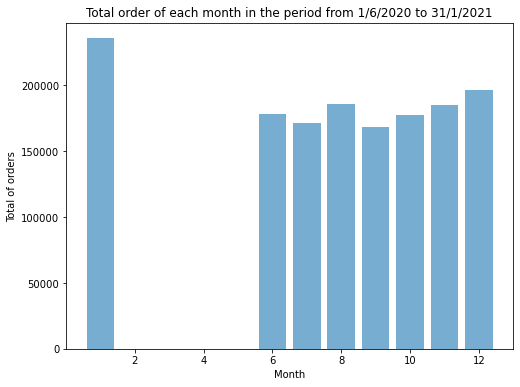

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_month['month'], group_month['order'], alpha=0.6)
ax.set(title='Total order of each month in the period from 1/6/2020 to 31/1/2021',
      xlabel = 'Month', ylabel = 'Total of orders');

- From the above bar chart, i found that there is not much fluctuation in purchasing of users (except for the month January 2021), eventhough in end of November is time of black friday,  December is time of christmas and then new year holiday. 
- --> **So I conclude, holidays does't affect significantly on the buying behavior of customers**
- we can evaluate which kind of items (categories) are bought the most during holidays, so that we can add categories which tend to be bought in week of valentine (or 1 week before that) in newsletter.

### Finding weeks with most orders

In [25]:
# group by week of month to see the distribution of orders in each week of each month
group_week = group_orders_df.groupby(['month','week_of_month']).agg({'order': 'sum'}).reset_index()

In [26]:
max_order_in_week = group_week.sort_values(by='order', ascending=False)
max_order_in_week.head(10)

,month,week_of_month,order
36,12,2,56831
2,1,3,54117
3,1,4,52832
33,11,4,51822
1,1,2,50846
0,1,1,49720
37,12,3,49168
5,6,1,48112
31,11,2,46652
35,12,1,46492


### Analyzing the distribution of orders in each week of month

In [27]:
# move all data of january 2021 to the end of the dataframe.
month_1 = group_week.iloc[0:5, :]
drop_group_week = group_week.drop([0, 1, 2, 3, 4])
arranged_group_week = drop_group_week.append(month_1, ignore_index=True)


In [28]:
weeks_months = pd.pivot_table(arranged_group_week, index='week_of_month', columns='month', values='order')
january = weeks_months[1]
arranged_months = weeks_months.drop(columns=1).join(january)
arranged_months

,6,7,8,9,10,11,12,1
week_of_month,,,,,,,,
1,48112,44177,41351,35032,37977,28499,46492,49720
2,32098,40262,41603,40148,44472,46652,56831,50846
3,39419,38597,42479,41339,41041,39694,49168,54117
4,42131,36071,39529,41129,37719,51822,29314,52832
5,16290,12238,21084,10888,16734,18604,14956,28427


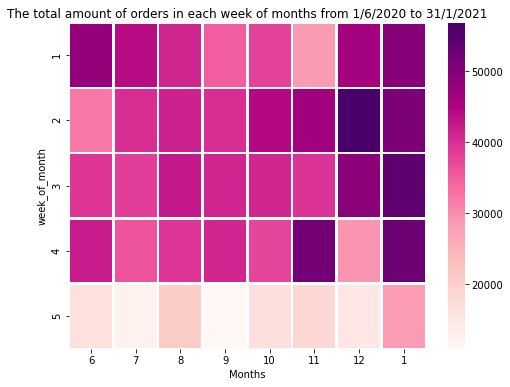

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(arranged_months, linecolor='White', cmap='RdPu', linewidth=1.5)
ax.set(title='The total amount of orders in each week of months from 1/6/2020 to 31/1/2021', xlabel='Months');

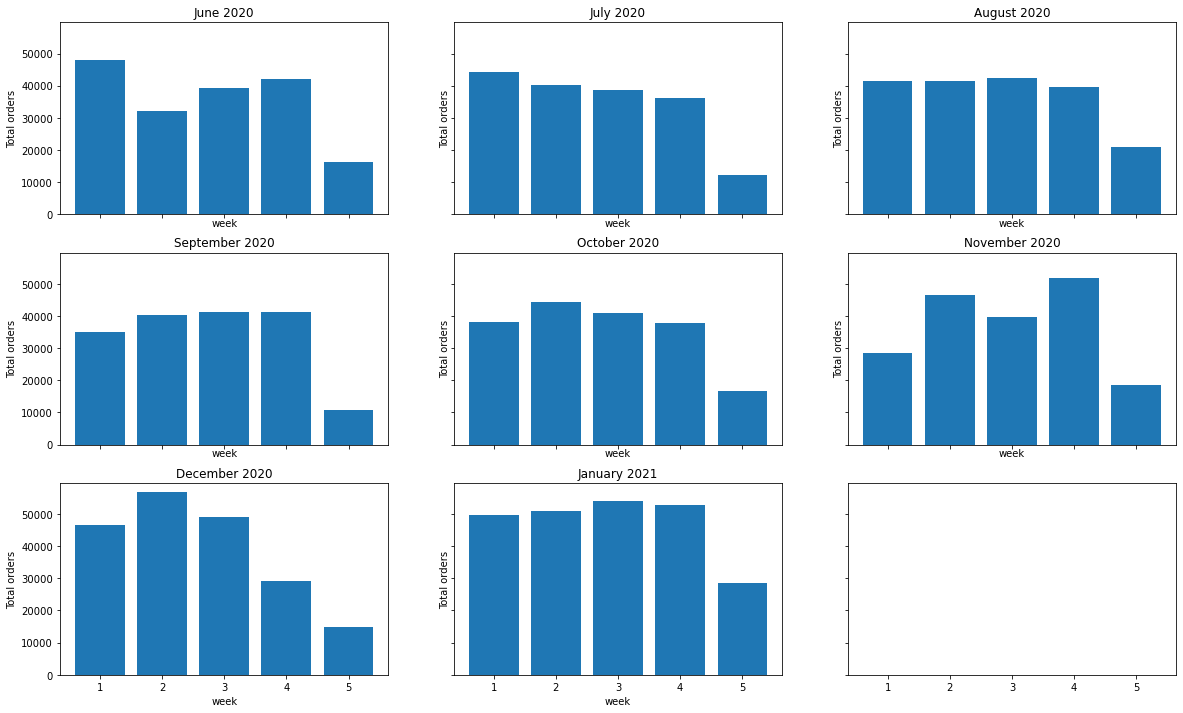

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 12), sharex='all', sharey='all')
# bar chart for June 2020
ax[0,0].bar(group_week.loc[group_week['month'] == 6]['week_of_month'], group_week.loc[group_week['month'] == 6]['order'])
ax[0,0].set(title='June 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for July 2020
ax[0,1].bar(group_week.loc[group_week['month'] == 7]['week_of_month'], group_week.loc[group_week['month'] == 7]['order'])
ax[0,1].set(title='July 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for August 2020
ax[0,2].bar(group_week.loc[group_week['month'] == 8]['week_of_month'], group_week.loc[group_week['month'] == 8]['order'])
ax[0,2].set(title='August 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for September 2020
ax[1,0].bar(group_week.loc[group_week['month'] == 9]['week_of_month'], group_week.loc[group_week['month'] == 9]['order'])
ax[1,0].set(title='September 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for October 2020
ax[1,1].bar(group_week.loc[group_week['month'] == 10]['week_of_month'], group_week.loc[group_week['month'] == 10]['order'])
ax[1,1].set(title='October 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for November 2020
ax[1,2].bar(group_week.loc[group_week['month'] == 11]['week_of_month'], group_week.loc[group_week['month'] == 11]['order'])
ax[1,2].set(title='November 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for December 2020
ax[2,0].bar(group_week.loc[group_week['month'] == 12]['week_of_month'], group_week.loc[group_week['month'] == 12]['order'])
ax[2,0].set(title='December 2020', xlabel = 'week', ylabel = 'Total orders')

# bar chart for January 2021
ax[2,1].bar(group_week.loc[group_week['month'] == 1]['week_of_month'], group_week.loc[group_week['month'] == 1]['order'])
ax[2,1].set(title='January 2021', xlabel = 'week', ylabel = 'Total orders')

plt.show()

# Analyzing items.csv and category_hierarchy.csv

### analyzing correlation between features of items

In [31]:
features_items = items_df.drop(columns=['itemID', 'brand', 'categories'])
features_items

,feature_1,feature_2,feature_3,feature_4,feature_5
0,4,0,490,2,66
1,10,1,537,0,101
2,10,0,511,0,0
3,10,1,511,0,0
4,4,1,484,0,66
...,...,...,...,...,...
32771,10,0,503,0,101
32772,4,2,491,3,66
32773,10,1,500,0,37
32774,6,2,491,0,117


In [32]:
# Get correlation of features
corr_features = features_items.corr()
# visualize only one half of the heatmap
corr_ones = np.ones_like(corr_features, dtype = bool)
mask = np.triu(corr_ones)   # np.triu returns only upper triangle matrix 
# removing the first row and first column of corr_features and mask
adjusted_corr_features = corr_features.iloc[1:, :-1]
adjusted_mask = mask[1:, :-1]
adjusted_corr_features

,feature_1,feature_2,feature_3,feature_4
feature_2,-0.000350,1.000000,0.080420,-0.062744
feature_3,0.136970,0.080420,1.000000,-0.092444
feature_4,0.008795,-0.062744,-0.092444,1.000000
feature_5,0.049549,-0.017626,-0.000903,0.110246


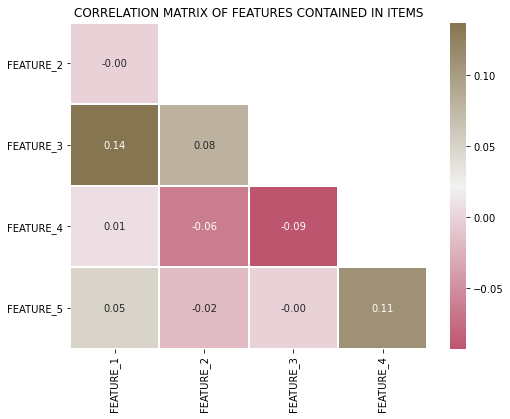

In [33]:
# draw the heatmap of corr_features
fig, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(360, 64, 51, as_cmap=True)
sns.heatmap(adjusted_corr_features, mask=adjusted_mask, annot=True, fmt='.2f', cmap=cmap, linecolor='white', linewidth=1)
yticks = [i.upper() for i in adjusted_corr_features.index]
xticks = [i.upper() for i in adjusted_corr_features.columns]
ax.set_yticklabels(yticks, rotation=0)
ax.set_xticklabels(xticks, rotation=90)
ax.set(title = 'CORRELATION MATRIX OF FEATURES CONTAINED IN ITEMS');

- From the heatmap we can find that feature_1 and feature_3 has the highest correlation with each other. Then we can consider about the relationship between feature_4 and feature_5 or the couple of features_2 and 3. 
- Maybe we can base on the correlation of features to clasify categories to the items their categories data are missing.
- --> But I still haven't found out the method to process missing data

In [34]:
items_df

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


In [35]:
category_df

,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


### Preprocessing missing data in items.csv ???

In [36]:
# merging orders.csv and items.csv(without features) based on itemID
items_categories_df = items_df[['itemID', 'categories']].copy()
oic_df = copy_orders_df.merge(items_categories_df, on='itemID')
oic_df

,date,userID,itemID,order,day_of_week,week_of_month,month,year,week_of_year,timeDeltaDays,timeDeltaWeeks,categories
0,2020-06-01,38769,3477,1,1,1,6,2020,23,1,1,"[74, 4109, 3867, 803, 4053]"
1,2020-06-01,23570,3477,1,1,1,6,2020,23,1,1,"[74, 4109, 3867, 803, 4053]"
2,2020-06-01,23495,3477,1,1,1,6,2020,23,1,1,"[74, 4109, 3867, 803, 4053]"
3,2020-06-01,26073,3477,1,1,1,6,2020,23,1,1,"[74, 4109, 3867, 803, 4053]"
4,2020-06-01,34302,3477,1,1,1,6,2020,23,1,1,"[74, 4109, 3867, 803, 4053]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1071533,2021-01-31,8789,16486,1,31,5,1,2021,4,245,35,[757]
1071534,2021-01-31,14861,7565,1,31,5,1,2021,4,245,35,NaN
1071535,2021-01-31,14850,7906,1,31,5,1,2021,4,245,35,[1350]
1071536,2021-01-31,3608,4530,3,31,5,1,2021,4,245,35,"[2561, 206]"


In [37]:
missing_categories = oic_df['categories'].isna().sum()
missing_percent = round((missing_categories / len(oic_df)) * 100, 2)
print(f"Percentage of missing category data: {missing_percent}%")

Percentage of missing category data: 1.48%


#### Group itemIDs per userID per week of month (without features)

In [38]:
# check which itemset are bought by one customer per week of month
group_date_userID = oic_df.groupby(['month','week_of_month', 'userID', 'itemID']).agg({'itemID': 'count'})
itemsets_df = group_date_userID.drop(columns=['itemID']).reset_index()
itemsets_df

,month,week_of_month,userID,itemID
0,1,1,1,29281
1,1,1,3,23738
2,1,1,10,28503
3,1,1,12,5484
4,1,1,12,6609
...,...,...,...,...
1069560,12,5,46108,18574
1069561,12,5,46115,22987
1069562,12,5,46131,4338
1069563,12,5,46131,13434


- itemsets_df includes all userID and itemID per week of month

In [39]:
# Check if there is any userID who buy one itemID more than one time per month. 
test_duplicate = itemsets_df[itemsets_df.duplicated(['month','userID', 'itemID'])]
test_duplicate

,month,week_of_month,userID,itemID
35764,1,2,474,22554
35926,1,2,779,21776
35956,1,2,839,26963
36128,1,2,1129,32204
36305,1,2,1360,14420
...,...,...,...,...
1069453,12,5,45667,5146
1069480,12,5,45843,19242
1069505,12,5,45924,25626
1069519,12,5,45987,3100


- The above dataframe includes all userID and itemID, so that these userID bought each itemID respectively more than one time per month ( that mean it shows us for each week of month who bought what)

In [40]:
# testing
itemsets_df[(itemsets_df['userID'] == 474) & (itemsets_df['itemID'] == 22554)]

,month,week_of_month,userID,itemID
318,1,1,474,22554
35764,1,2,474,22554


#### Split itemsets_df to different months

In [41]:
month_1 = itemsets_df[itemsets_df.iloc[:, 0] == 1]
month_6 = itemsets_df[itemsets_df.iloc[:, 0] == 6]
month_7 = itemsets_df[itemsets_df.iloc[:, 0] == 7]
month_8 = itemsets_df[itemsets_df.iloc[:, 0] == 8]
month_9 = itemsets_df[itemsets_df.iloc[:, 0] == 9]
month_10 = itemsets_df[itemsets_df.iloc[:, 0] == 10]
month_11 = itemsets_df[itemsets_df.iloc[:, 0] == 11]
month_12 = itemsets_df[itemsets_df.iloc[:, 0] == 12]

#### Extract the data of purchase history per week of month (without features)

In [42]:
#month_1.to_csv('hist_month_1.csv', sep = '|' )
#month_6.to_csv('hist_month_6.csv', sep = '|')
#month_7.to_csv('hist_month_7.csv', sep = '|')
#month_8.to_csv('hist_month_8.csv', sep = '|')
#month_9.to_csv('hist_month_9.csv', sep = '|')
#month_10.to_csv('hist_month_10.csv', sep = '|')
#month_11.to_csv('hist_month_11.csv', sep = '|')
#month_12.to_csv('hist_month_12.csv', sep = '|')

In [43]:
#itemsets_df.to_csv('hist_period.csv', sep = '|')

#### Ploting number of userID per months

In [44]:
# number of userID per months
user_6 = month_6['userID'].nunique()
user_7 = month_7['userID'].nunique()
user_8 = month_8['userID'].nunique()
user_9 = month_9['userID'].nunique()
user_10 = month_10['userID'].nunique()
user_11 = month_11['userID'].nunique()
user_12 = month_12['userID'].nunique()
user_1 = month_1['userID'].nunique()

<ipython-input-45-1b6e620f7f16>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


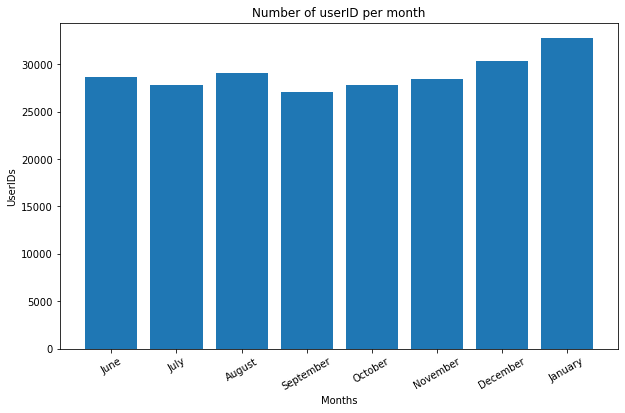

In [45]:
# plot
fig = plt.figure(figsize=(10, 6))
user_per_month = [user_6, user_7, user_8, user_9, user_10, user_11, user_12, user_1]
plt.bar([0, 1, 2, 3, 4, 5, 6, 7], user_per_month)
ax = plt.subplot()
x = range(8)
x_labels = ['June', 'July', 'August', 'September','October', 'November', 'December', 'January']
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation = 30)
plt.xlabel('Months')
plt.title('Number of userID per month')
plt.ylabel('UserIDs');

- From the above bar chart we can find the increasing tendency of number of users over the time from September to January

#### check whether userIDs and itemIDs in the submission file exist in the orders file

In [46]:
old_userIDs = orders_df['userID'].unique()
bought_itemIDs = orders_df['itemID'].unique()

In [47]:
def check_occurrence(list_to_check, old_list):
    """This function is to check for each element in the list_to_check whether it occurres in old_list or not
    """
    new_list = []
    for element in list_to_check:
        if element in old_list:
            break
        else:
            new_list.append(element)
    return new_list

In [48]:
new_userIDs = check_occurrence(submission_df['userID'], old_userIDs)
new_itemIDs = check_occurrence(submission_df['itemID'], bought_itemIDs)
print(f"New users: {new_userIDs}")
print(f"New items: {new_itemIDs}")

New users: []
New items: []


- So all userIDs and itemIDs in the submission file which we have to fulfill according to our model have already occurred in the historical purchasing (orders file)

### Analyzing and Processing submission file

In [49]:
# getting a dataframe from submission file by droping column Prediction and groupby userID and itemID
copy_submission_df = submission_df.drop('prediction', axis=1).groupby(['userID', 'itemID']).count().reset_index()
copy_submission_df

,userID,itemID
0,0,20664
1,0,28231
2,13,2690
3,15,1299
4,15,20968
...,...,...
9995,46118,20106
9996,46124,19677
9997,46125,12878
9998,46127,7963


In [50]:
# check duplicate of (userID and itemID in) submission
duplicated_sub = copy_submission_df[copy_submission_df.duplicated(['userID', 'itemID'])]
duplicated_sub

,userID,itemID


- For each userID with respective itemID, it appears only one time in the submission file

# 12.5.2022: Calculating average cycle of all combinations between user and item in order file

In [51]:
copy_orders_df.head()

,date,userID,itemID,order,day_of_week,week_of_month,month,year,week_of_year,timeDeltaDays,timeDeltaWeeks
0,2020-06-01,38769,3477,1,1,1,6,2020,23,1,1
1,2020-06-01,42535,30474,1,1,1,6,2020,23,1,1
2,2020-06-01,42535,15833,1,1,1,6,2020,23,1,1
3,2020-06-01,42535,20131,1,1,1,6,2020,23,1,1
4,2020-06-01,42535,4325,1,1,1,6,2020,23,1,1


### Group itemIDs per userID per timeDeltaWeeks

In [52]:
orders_short = copy_orders_df.drop(columns = ['date', 'order', 'day_of_week', 'week_of_month','year', 'week_of_year', 'timeDeltaDays'])


In [53]:
# Group all combinations of userID and itemID which appear in the same timeDeltaWeeks into 1 row
group_orders_df = orders_short.groupby(['month','userID', 'itemID', 'timeDeltaWeeks']).agg({'itemID': 'count'})
order_itemsets_df = group_orders_df.drop(columns=['itemID']).reset_index()
order_itemsets_df

,month,userID,itemID,timeDeltaWeeks
0,1,0,6446,33
1,1,0,13146,35
2,1,0,28231,35
3,1,0,29956,33
4,1,1,425,33
...,...,...,...,...
1069545,12,46134,29345,28
1069546,12,46135,32204,28
1069547,12,46136,1782,31
1069548,12,46136,23669,27


In [54]:
# Create an empty DataFrame of purchase_history 
purchase_history_per_user_df = pd.DataFrame({'month':[],
                   'timeDeltaWeeks': [],
                   'userID': [],
                   'itemID': [],}, dtype = 'i4')
# loop through each userID to get all of their historical purchases and add to the purchase_history
for user in old_userIDs:
    order = order_itemsets_df[order_itemsets_df['userID'] == user]
    purchase_history_per_user_df = pd.concat([purchase_history_per_user_df, order], ignore_index = True)
    
purchase_history_per_user_df

,month,timeDeltaWeeks,userID,itemID
0,1,32,38769,7970
1,1,32,38769,10507
2,1,32,38769,12032
3,1,32,38769,13019
4,1,32,38769,18220
...,...,...,...,...
1069545,1,35,13983,30433
1069546,1,35,13983,31354
1069547,1,35,18947,4061
1069548,1,35,18947,18630


### Create a history purchase DataFrame of all userIDs and itemIDs in the order file and update all timeDeltaWeeks, in which that user bought that item

In [ ]:
# list_weeks is used to update all list of weeks, in which one user bought a certain item. 

list_weeks = []
for i in range(len(copy_orders_df['userID'])):
    user = copy_orders_df['userID'][i]
    item = copy_orders_df['itemID'][i]
    # get a subdataframe which match with user and item
    df = copy_orders_df[(copy_orders_df['userID'] == user) & (copy_orders_df['itemID'] == item)]
    weeks = df['timeDeltaWeeks'].to_list()
    list_weeks.append(weeks)

# adding list_weeks to the dataframe submission_history
copy_orders_df['weeks_bought_item'] = list_weeks
copy_orders_df

In [ ]:
purchase_history_per_user_df.to_csv('purchase_based_on_orders.csv')

# 8.5.2022: Processing data in submission file

## Create a DataFrame which manage all purchase history per userID (without features)
- purchase_history_per_user is the dataframe which manage all purchase history of each userID in the period of time from June 2020 to January 2021. Therefore from this dataframe we can search for one userID to know all the itemID they bought and the week of month they bought it

In [49]:
copy_orders_df

,date,userID,itemID,order,day_of_week,week_of_month,month,year,week_of_year
0,2020-06-01,38769,3477,1,1,1,6,2020,23
1,2020-06-01,42535,30474,1,1,1,6,2020,23
2,2020-06-01,42535,15833,1,1,1,6,2020,23
3,2020-06-01,42535,20131,1,1,1,6,2020,23
4,2020-06-01,42535,4325,1,1,1,6,2020,23
...,...,...,...,...,...,...,...,...,...
1071533,2021-01-31,22114,29567,2,31,5,1,2021,4
1071534,2021-01-31,22114,21068,1,31,5,1,2021,4
1071535,2021-01-31,10900,18270,1,31,5,1,2021,4
1071536,2021-01-31,17894,31265,5,31,5,1,2021,4


#### Group itemIDs per userID per week of month (without features)

In [50]:
group_orders_df = copy_orders_df.groupby(['month', 'week_of_month', 'week_of_year', 'userID', 'itemID']).agg({'itemID': 'count'})
order_itemsets_df = group_orders_df.drop(columns=['itemID']).reset_index()
order_itemsets_df

,month,week_of_month,week_of_year,userID,itemID
0,1,1,1,3,23738
1,1,1,1,10,28503
2,1,1,1,12,13187
3,1,1,1,12,14005
4,1,1,1,12,23348
...,...,...,...,...,...
1070089,12,5,53,46108,18574
1070090,12,5,53,46115,22987
1070091,12,5,53,46131,4338
1070092,12,5,53,46131,13434


In [51]:
# Create an empty DataFrame of purchase_history 
purchase_history_per_user_df = pd.DataFrame({'month':[],
                   'week_of_month': [],
                    'week_of_year': [],
                   'userID': [],
                   'itemID': [],}, dtype = 'i4')
# loop through each userID to get all of their historical purchases and add to the purchase_history
for user in old_userIDs:
    order = order_itemsets_df[order_itemsets_df['userID'] == user]
    purchase_history_per_user_df = pd.concat([purchase_history_per_user_df, order], ignore_index = True)
    
purchase_history_per_user_df

,month,week_of_month,week_of_year,userID,itemID
0,1,1,1,38769,7970
1,1,1,1,38769,10507
2,1,1,1,38769,12032
3,1,1,1,38769,13019
4,1,1,1,38769,18220
...,...,...,...,...,...
1070089,1,5,4,13983,30433
1070090,1,5,4,13983,31354
1070091,1,5,4,18947,4061
1070092,1,5,4,18947,18630


## Create a history purchase DataFrame of all userIDs and itemIDs in the submission file and update all weeks of year, in which that user bought that item

In [52]:
submission_history = submission_df.drop(columns = ['prediction'])
# list_weeks is used to update all list of weeks, in which one user bought a certain item. 

list_weeks = []
for i in range(len(submission_history['userID'])):
    user = submission_history['userID'][i]
    item = submission_history['itemID'][i]
    # get a subdataframe which match with user and item
    df = purchase_history_per_user_df[(purchase_history_per_user_df['userID'] == user) & (purchase_history_per_user_df['itemID'] == item)]
    weeks = df['week_of_year'].to_list()
    list_weeks.append(weeks)

# adding list_weeks to the dataframe submission_history
submission_history['weeks_bought_item'] = list_weeks
submission_history

,userID,itemID,weeks_bought_item
0,0,20664,"[23, 41, 50]"
1,0,28231,"[4, 47, 50]"
2,13,2690,"[23, 34, 44, 52]"
3,15,1299,"[2, 37, 48, 52]"
4,15,20968,"[4, 41, 48, 52]"
...,...,...,...
9995,46118,20106,"[28, 36, 40, 46, 52]"
9996,46124,19677,"[3, 32, 37, 43, 47, 52]"
9997,46125,12878,"[4, 23, 46]"
9998,46127,7963,"[28, 33, 39, 48, 51]"


### Calculate the average cycle of purchasing of each user for each certain item ( That means how long did one user  buy a certain item again). The calculation is according to week

In [53]:
# weeks are smaller than 6 (that mean it is in january 2021) will be added with 53(the last week of year 2020).
# The aim of this action is to easily calculate the avearge cycle of purchasing of each user for each certain item
adjust_list_weeks = [] # this one contains all list of weeks after adjusting
for li in list_weeks:
    sublist = []  # this one include elements of a list in list_weeks
    for element in li:
        if element < 6:
            element = element + 53
        sublist.append(element)
    sublist.sort() # sort increasingly elements of sublist 
    adjust_list_weeks.append(sublist)

In [54]:
# writing a function which calculate the average distance between elements in a list 
# For example: give list = [23, 41, 50]: -->average = ((50 - 41) + (41 - 23)) / (len(list) - 1)
def calculate_distance(list_distance):
    avg_cicle = 0
    # if list_distance has only one element (that means user bought that item only one time), so avg_cicle should be 0
    if len(list_distance) <= 1:
        return 0
    # for the case that user bought one certain item in two continous weeks as week_of_month, but as week_of_year, it is only in one week
    #elif (len(list_distance) == 2) and (list_distance[0] == list_distance[1]): 
        #return 1
    else:
        for i in range(len(list_distance) - 1, 0, -1): # i goes down to 1
            j = i - 1
            avg_cicle = avg_cicle + list_distance[i] - list_distance[j]
        return round(avg_cicle / (len(list_distance) - 1), 2)  # result is rounded to 2 decimals


In [55]:
# Apply function calculate_distance to all elements of adjust_list_weeks and save it into a list of avg_cicle_list
avg_cicle_list = []
for weeks in adjust_list_weeks:
    avg_cicle = calculate_distance(weeks)
    avg_cicle_list.append(avg_cicle)


In [56]:
# adding avg_cicle_list to the datafram submission_history as a new column
submission_history['adjusted_weeks_bought_item'] = adjust_list_weeks
submission_history['average_cicle(weeks)'] = avg_cicle_list
submission_history

,userID,itemID,weeks_bought_item,adjusted_weeks_bought_item,average_cicle(weeks)
0,0,20664,"[23, 41, 50]","[23, 41, 50]",13.50
1,0,28231,"[4, 47, 50]","[47, 50, 57]",5.00
2,13,2690,"[23, 34, 44, 52]","[23, 34, 44, 52]",9.67
3,15,1299,"[2, 37, 48, 52]","[37, 48, 52, 55]",6.00
4,15,20968,"[4, 41, 48, 52]","[41, 48, 52, 57]",5.33
...,...,...,...,...,...
9995,46118,20106,"[28, 36, 40, 46, 52]","[28, 36, 40, 46, 52]",6.00
9996,46124,19677,"[3, 32, 37, 43, 47, 52]","[32, 37, 43, 47, 52, 56]",4.80
9997,46125,12878,"[4, 23, 46]","[23, 46, 57]",17.00
9998,46127,7963,"[28, 33, 39, 48, 51]","[28, 33, 39, 48, 51]",5.75


In [57]:
# extra dataframe submission_history to csv file
#submission_history.to_csv('submission_weeks_list.csv', sep='|')

In [58]:
submission_history[submission_history['average_cicle(weeks)'] == 0]

,userID,itemID,weeks_bought_item,adjusted_weeks_bought_item,average_cicle(weeks)
1256,5875,25706,[35],[35],0.0
1377,6458,13305,[34],[34],0.0
1811,8292,11251,[23],[23],0.0
2411,11361,5349,[2],[55],0.0
3095,14085,3601,"[34, 34]","[34, 34]",0.0
3305,15011,12773,"[35, 35]","[35, 35]",0.0
3471,15709,2626,"[38, 38]","[38, 38]",0.0
3525,16022,20131,"[47, 47]","[47, 47]",0.0
4750,21730,15971,[49],[49],0.0
5312,24247,20515,[51],[51],0.0


# ? Problem with week_of_month and week_of_year (Need to fix)

In [59]:
purchase_history_per_user_df[(purchase_history_per_user_df['userID'] == 15011) & (purchase_history_per_user_df['itemID'] == 12773)]

,month,week_of_month,week_of_year,userID,itemID
175833,8,4,35,15011,12773
175835,8,5,35,15011,12773


In [60]:
purchase_history_per_user_df[(purchase_history_per_user_df['userID'] == 14085) & (purchase_history_per_user_df['itemID'] == 3601)]

,month,week_of_month,week_of_year,userID,itemID
108599,8,3,34,14085,3601
108600,8,4,34,14085,3601


In [67]:
orders_df[(orders_df['userID'] == 14085) & (orders_df['itemID'] == 3601)]

,date,userID,itemID,order
345666,2020-08-21,14085,3601,2
349382,2020-08-23,14085,3601,1


## Create a DataFrame which display all historical purchases of all userIDs in the submission file ( don't care about week_of_year)
- The aim is to keep track all historical transactions of all userIDs who we need to predict purchasing behavior in February 2021

In [61]:
user_in_submission = submission_df['userID'].unique()

In [62]:
# Create an empty DataFrame of purchase_history_submission 
purchase_history_submission = pd.DataFrame({'month':[],
                   'week_of_month': [],
                   'userID': [],
                   'itemID': []}, dtype = 'i4')
purchase_df = purchase_history_per_user_df.drop(columns = ['week_of_year'])
# loop through each userID to get all of their historical purchases and add to the purchase_history_submission
for user in user_in_submission:
    order = purchase_df[purchase_df['userID'] == user]
    purchase_history_submission = pd.concat([purchase_history_submission, order], ignore_index = True)
    
    
purchase_history_submission

,month,week_of_month,userID,itemID
0,1,3,0,6446
1,1,3,0,29956
2,1,4,0,13146
3,1,4,0,28231
4,6,1,0,20664
...,...,...,...,...
273341,12,2,46130,10052
273342,12,2,46130,10957
273343,12,2,46130,23587
273344,12,3,46130,395


In [63]:
# For purpose of testing the number of userIDs in submission file and in the new DataFrame created
print(f"number of userIDs in submission file: {len(user_in_submission)}")
print(f"number of userIDs in purchase_history_submission DataFrame: {len(purchase_history_submission['userID'].unique())}")

number of userIDs in submission file: 7251
number of userIDs in purchase_history_submission DataFrame: 7251


### Merge 2 DataFrame submission_history and purchase_history_submission into a dataframe, which has columns =(month, week_of_month, userID, itemID, average_cicle(weeks))
- submission_with_cicle shows us purchasing information of all users in submission file. That means for each user and each certain item, we know all weeks they bought it and the average cicle that the user tends to buy that item again

In [64]:
drop_sub = submission_history.drop(columns = ['weeks_bought_item', 'adjusted_weeks_bought_item'])
submission_with_cicle = purchase_history_submission.merge(drop_sub, on = ['userID', 'itemID'])
submission_with_cicle

,month,week_of_month,userID,itemID,average_cicle(weeks)
0,1,4,0,28231,5.00
1,11,3,0,28231,5.00
2,12,2,0,28231,5.00
3,6,1,0,20664,13.50
4,10,2,0,20664,13.50
...,...,...,...,...,...
31887,11,5,46127,7963,5.75
31888,12,2,46127,7963,5.75
31889,6,1,46130,395,14.00
31890,11,2,46130,395,14.00


### split purchase_history_submission into months

In [65]:
fmonth_1 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 1]
fmonth_6 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 6]
fmonth_7 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 7]
fmonth_8 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 8]
fmonth_9 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 9]
fmonth_10 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 10]
fmonth_11 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 11]
fmonth_12 = submission_with_cicle[submission_with_cicle.iloc[:, 0] == 12]

In [66]:
fmonth_1

,month,week_of_month,userID,itemID,average_cicle(weeks)
0,1,4,0,28231,5.00
10,1,2,15,1299,6.00
14,1,4,15,20968,5.33
24,1,2,34,31244,10.50
31,1,1,46,31083,12.00
...,...,...,...,...,...
31846,1,2,46095,19519,9.50
31853,1,2,46096,6923,3.50
31865,1,3,46107,11349,14.50
31875,1,4,46124,19677,4.80
